
# Assignment No 4b
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

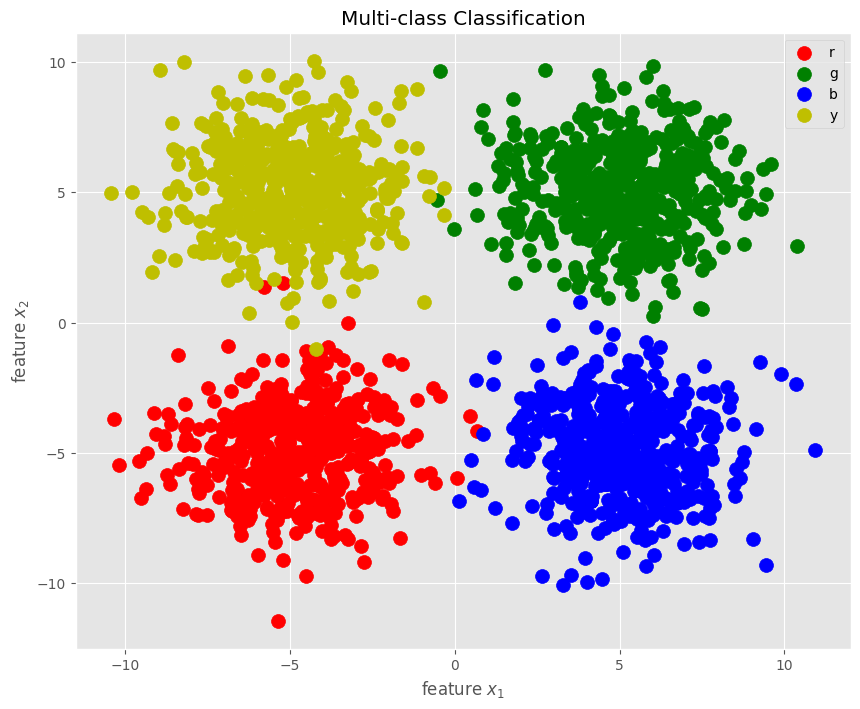

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples//4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples//4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))


In [13]:
import randomForest as rf

In [14]:
rfc=rf.RandomForest(weaklearner='Linear')

In [15]:
print(X.shape, Y.shape)

(2000, 2) (2000, 1)


In [16]:
%pdb off
rfc.train(X,Y)

Automatic pdb calling has been turned OFF


In [17]:
len(rfc.trees)

10

In [18]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print(Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        496    0    2    2   500
2.0          0  498    0    2   500
3.0          4    9  487    0   500
4.0          2    0    0  498   500
All        502  507  489  502  2000

In [20]:
%pdb off
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        496    0    2    2   500
2.0          0  498    0    2   500
3.0          4    9  487    0   500
4.0          2    0    0  498   500
All        502  507  489  502  2000

In [21]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


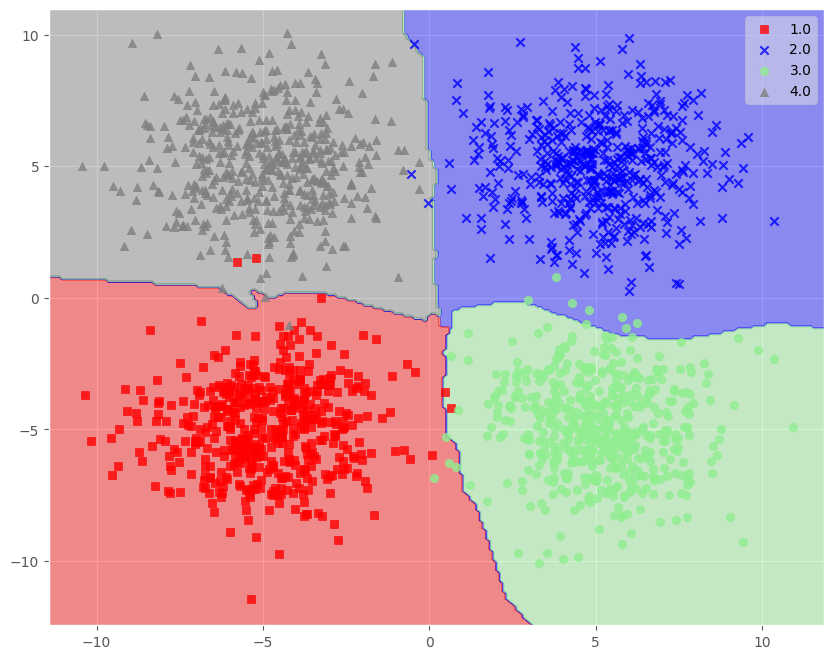

In [22]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

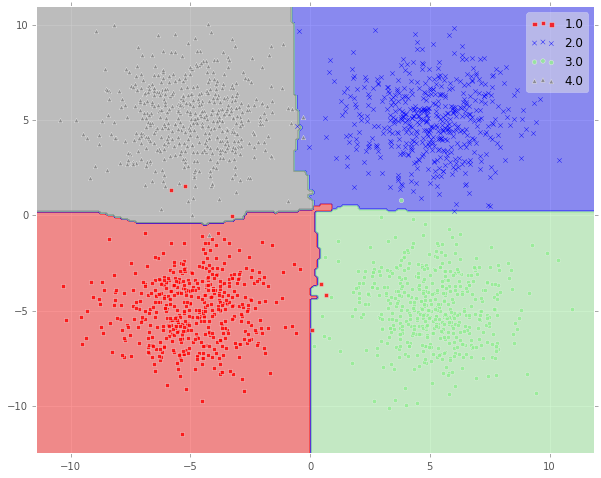

In [12]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [23]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        250    0    0    0   250
2.0          0  249    0    1   250
3.0          3    5  242    0   250
4.0          1    0    0  249   250
All        254  254  242  250  1000

In [25]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        250    0    0    0   250
2.0          0  249    0    1   250
3.0          3    5  242    0   250
4.0          1    0    0  249   250
All        254  254  242  250  1000

In [26]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


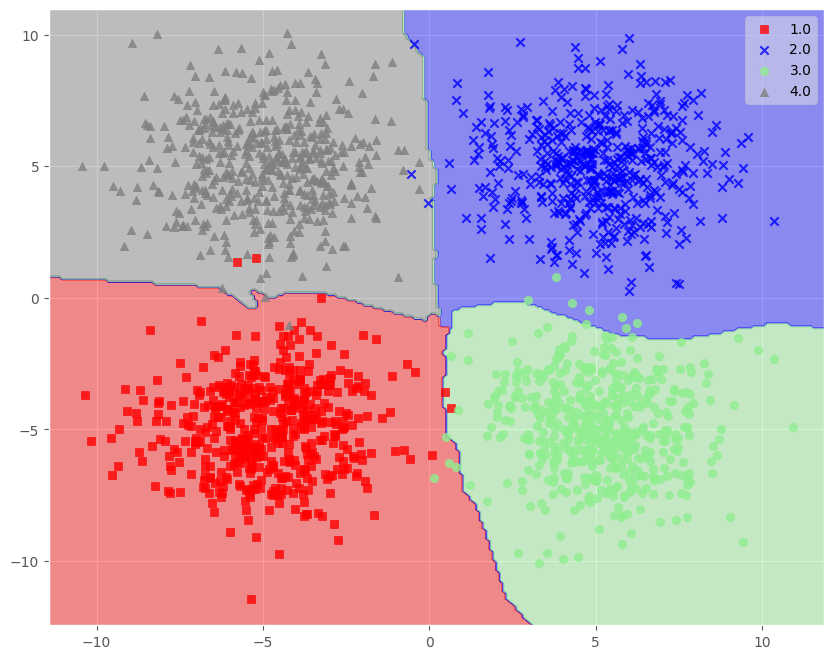

In [27]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

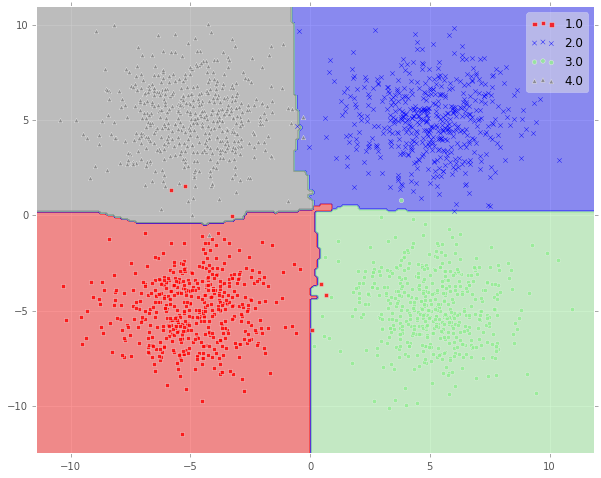

In [15]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned OFF
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


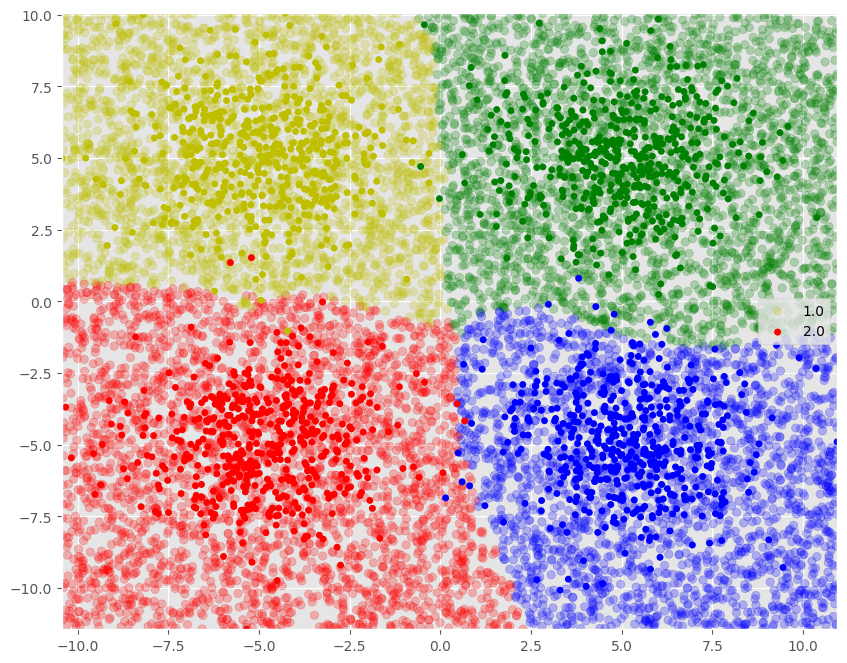

In [28]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb off
t.plot_points_range(rfc,X,Y,10000)

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


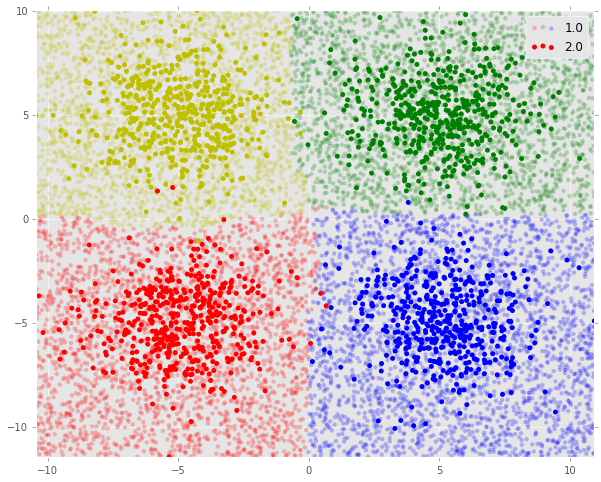

In [16]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

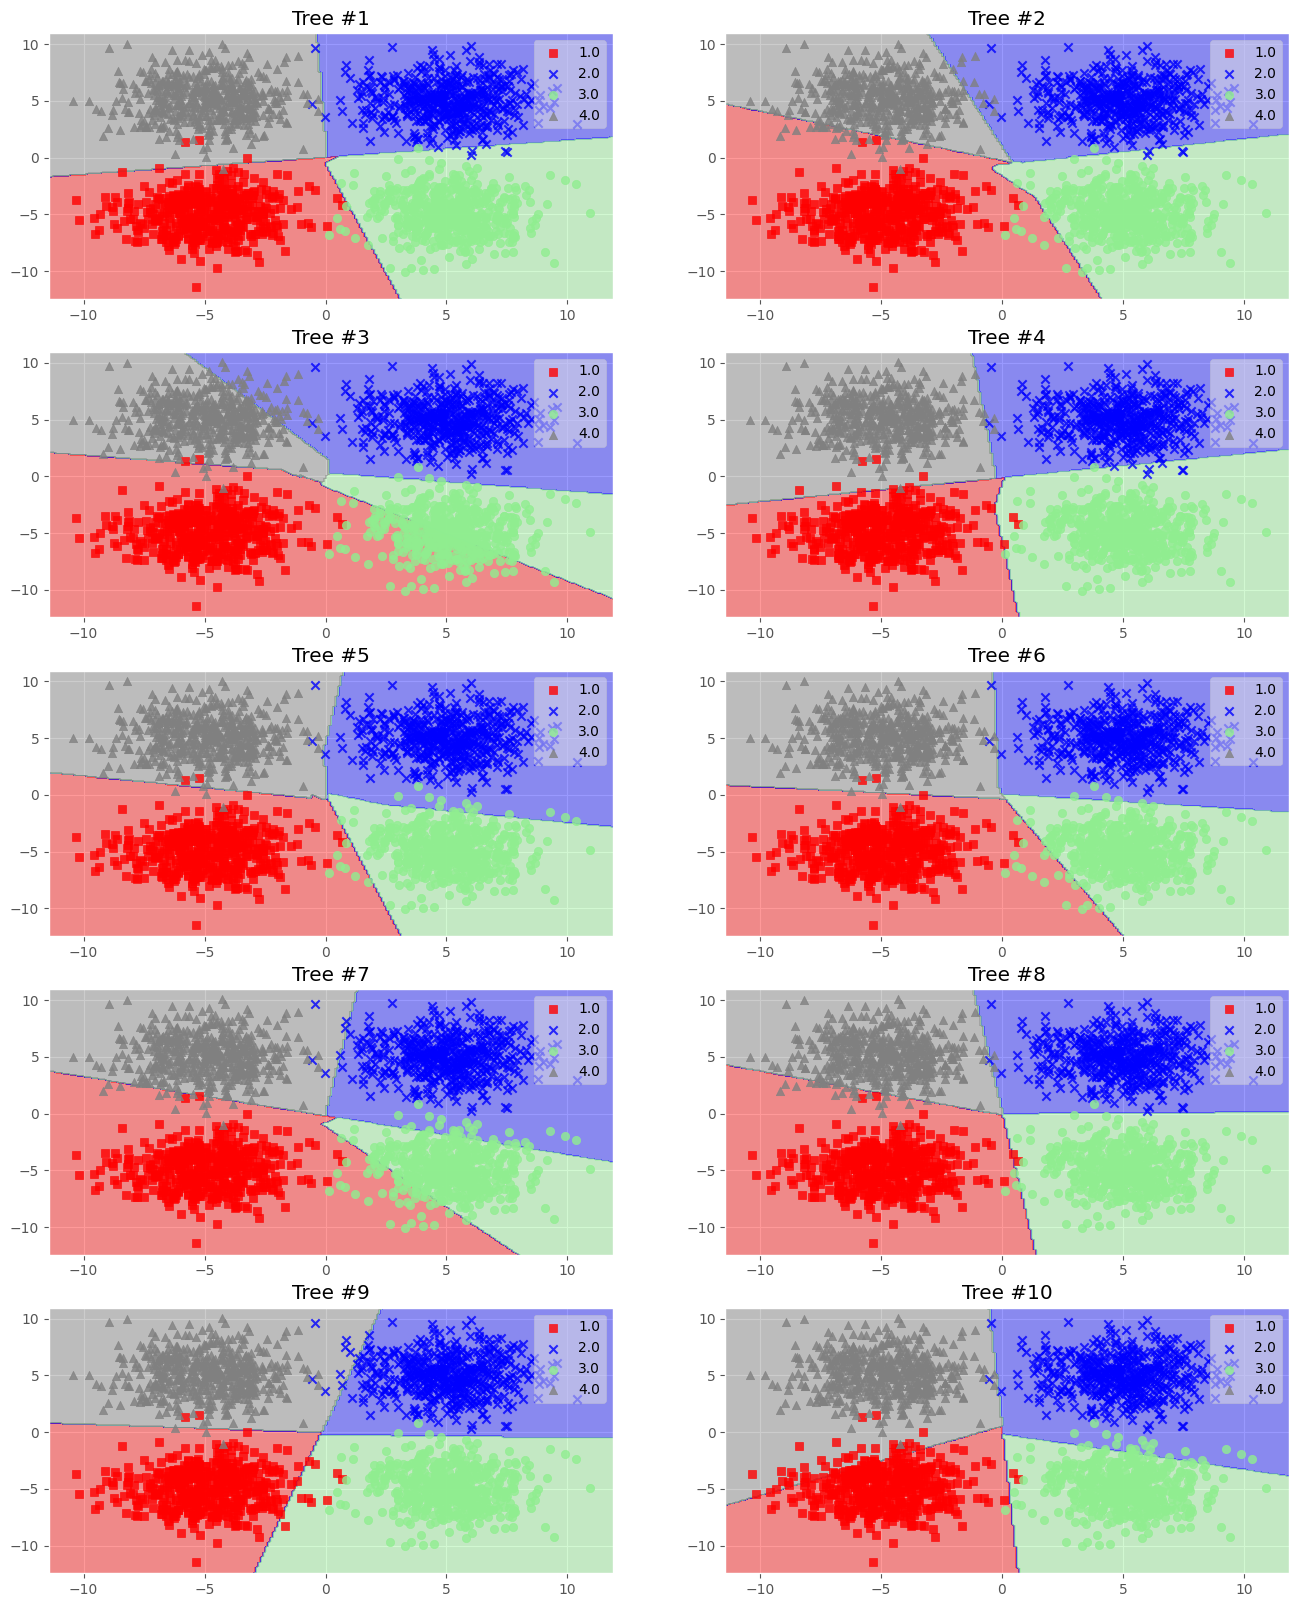

In [29]:
ntrees=rfc.ntrees
nrows=ntrees//2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

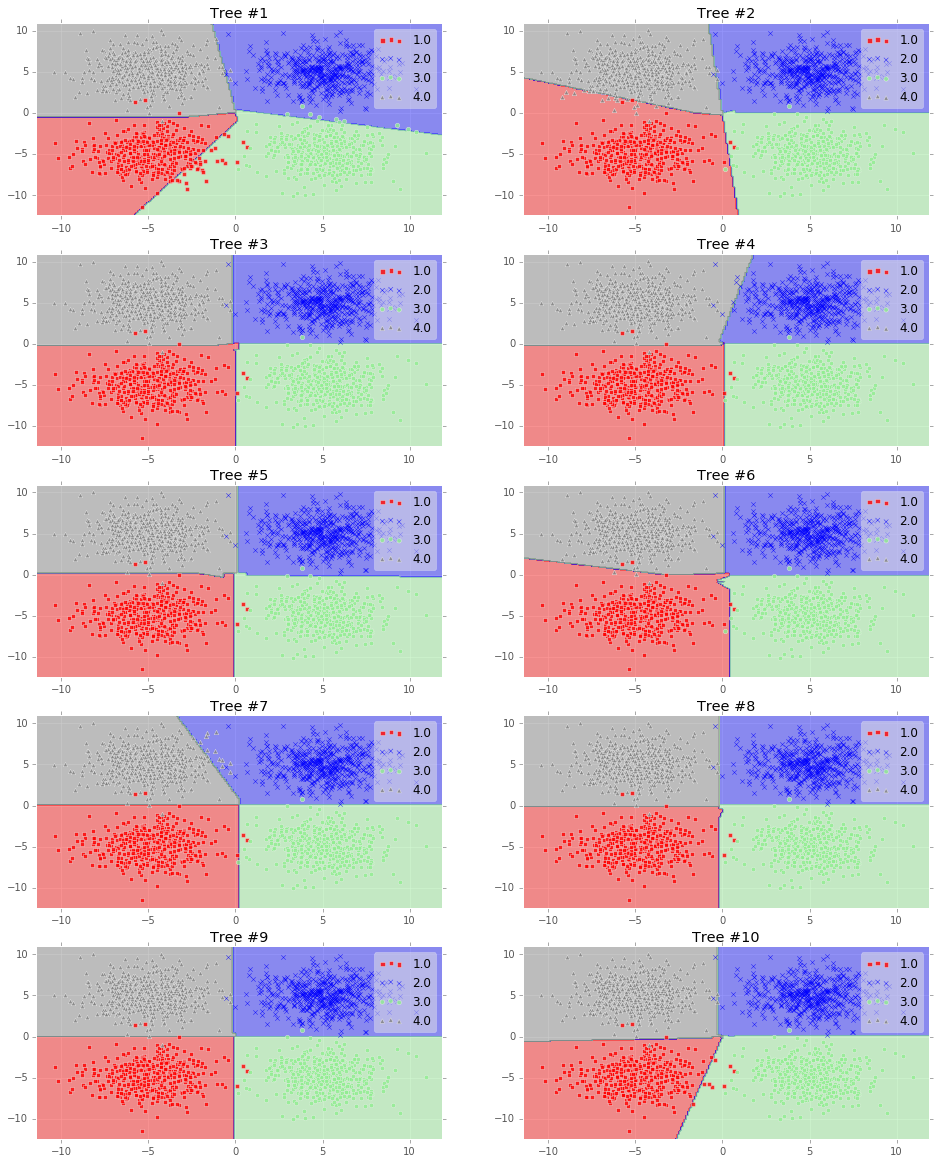

In [17]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

In [ ]:
# Different trees from the random forest have learned different separating lines from the training data. 
# This is the reason why the random forest is able to generalize well on the testing data. The random forest is able to generalize well on the testing data 
# because it averages the predictions of the individual trees. The individual trees are able to learn different separating lines from the training data. 


## Lets Run on Nonlinear Data, The Spherical Examples...

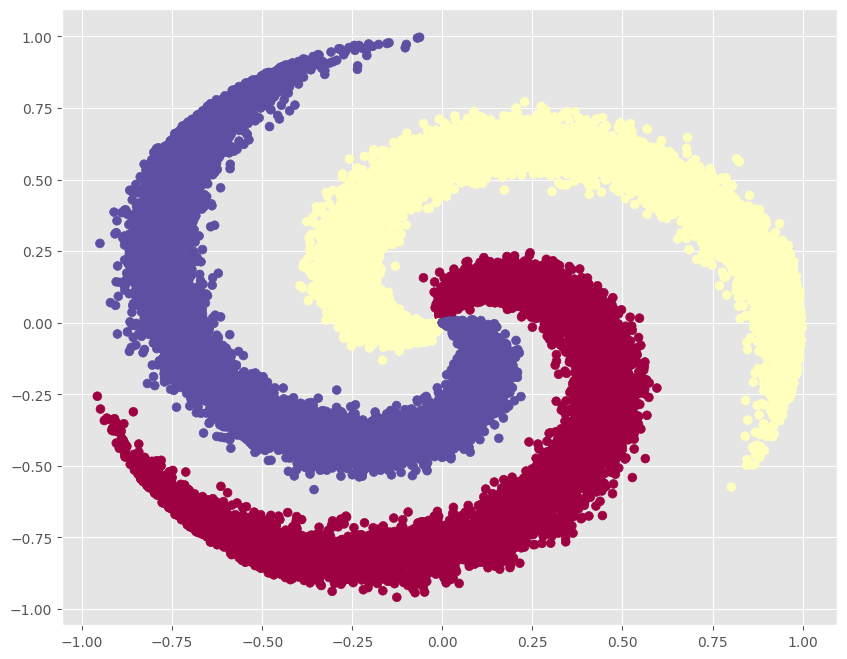

In [30]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

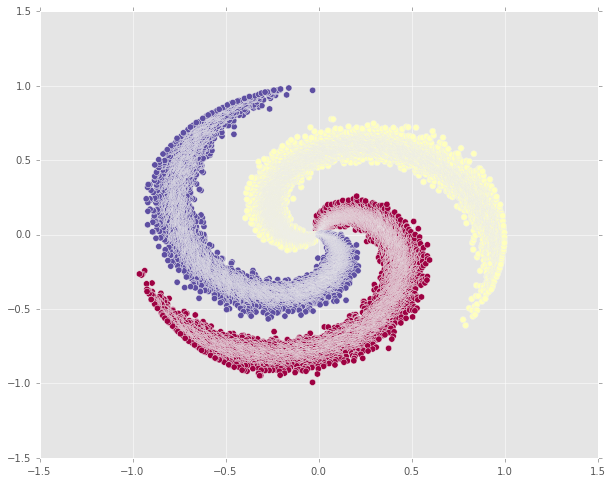

In [18]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [31]:
print(X.shape, Y.shape)

(30000, 2) (30000,)


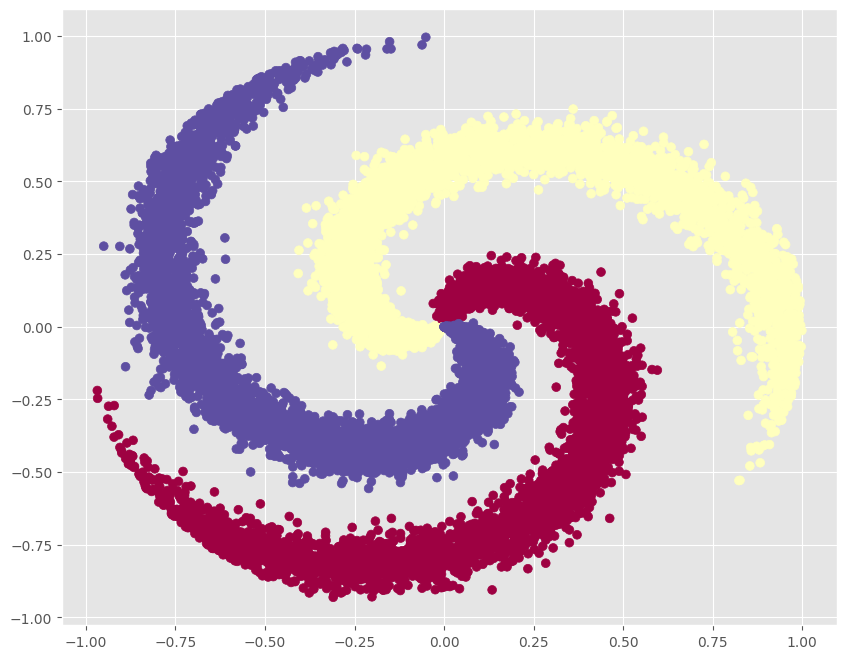

In [32]:

Xtest,Ytest=t.get_spherical_data(N=5000)

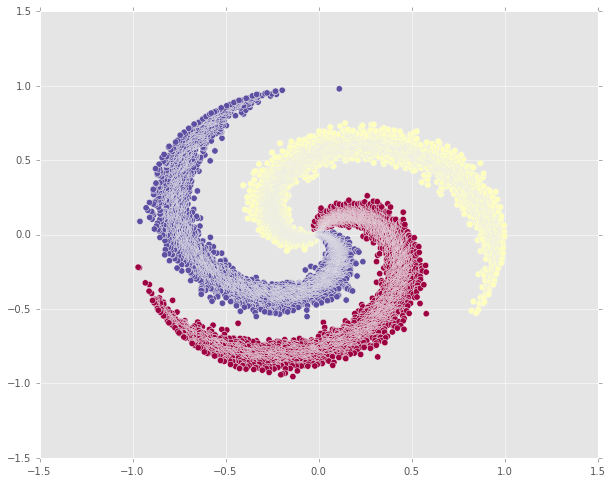

In [20]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [33]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [21]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Creating Left Child Node With 7616 Examples, and Right Node with 22384 Examples
Creating Left Child Node With 3593 Examples, and Right Node with 4023 Examples
Creating Left Child Node With 2384 Examples, and Right Node with 1209 Examples
Creating Left Child Node With 1968 Examples, and Right Node with 416 Examples
Creating Child Node With ClassLabel=0, nexamples=1968, classes=[(0, 1968)]
Creating Child Node With ClassLabel=0, nexamples=416, classes=[(0, 403), (1, 13)]
Creating Left Child Node With 696 Examples, and Right Node with 513 Examples
Creating Child Node With ClassLabel=0, nexamples=696, classes=[(0, 696)]
Creating Child Node With ClassLabel=1, nexamples=513, classes=[(1, 513)]
Creating Left Child Node With 976 Examples, and Right Node with 3047 Examples
Creating Left Child Node With 0 Examples, and Right Node with 976 Examples
Creating Child Node With ClassLabel=0, nexamples=976, classes=[(0, 976)]
Creating Left Child Node With 6 Examples, and Right Node with 3041 Examples
Cr

In [34]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print(Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted   0.0    1.0    2.0    All
Actual                              
0          9796     18    186  10000
1            47   9949      4  10000
2            17    109   9874  10000
All        9860  10076  10064  30000

In [36]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted   0.0   1.0   2.0    All
Actual                            
0          4897    11    92   5000
1            23  4974     3   5000
2            10    68  4922   5000
All        4930  5053  5017  15000

In [37]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


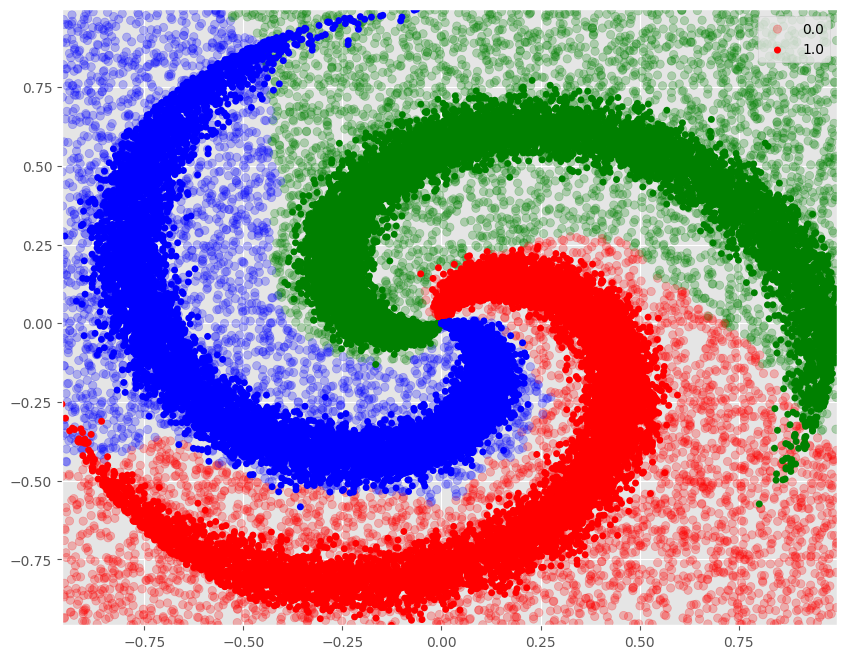

In [38]:
t.plot_points_range(rfc,X,Y)

(10000, 2)
[0, 1, 2]


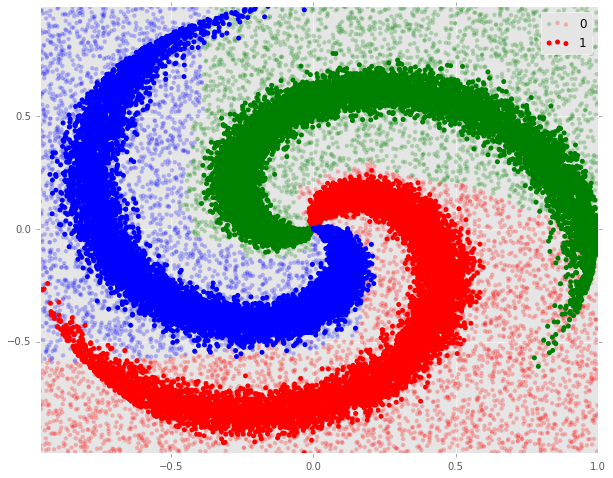

In [25]:
t.plot_points_range(rfc,X,Y)

d:\D-Documents\University\Sem 5\ML\Assignments\Assignment4\Attempt2\Assignment4\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


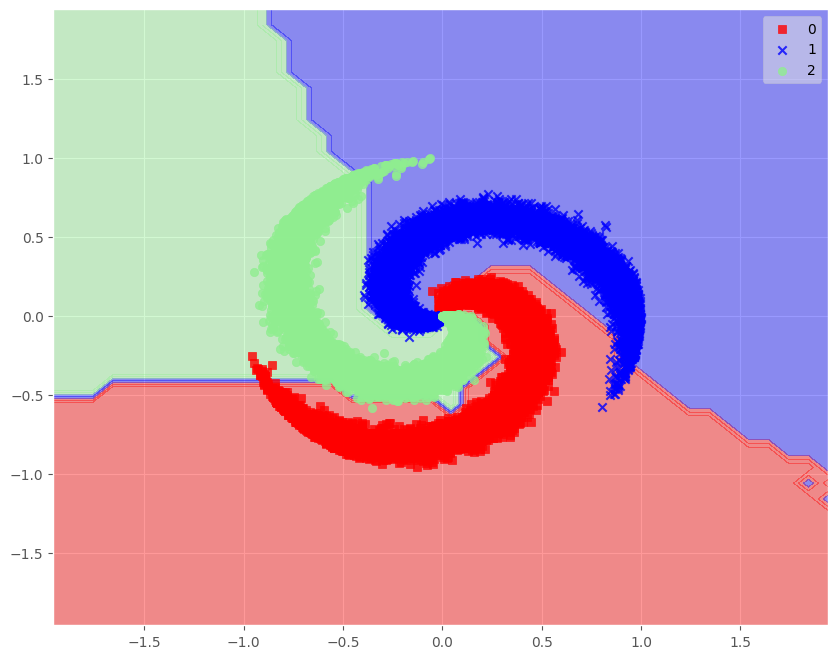

In [39]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

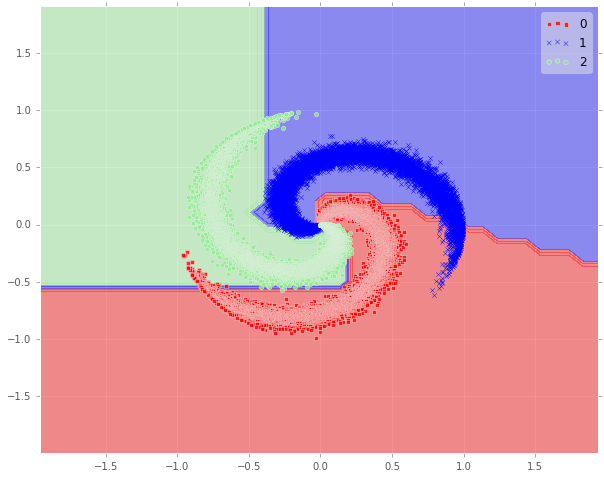

In [26]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

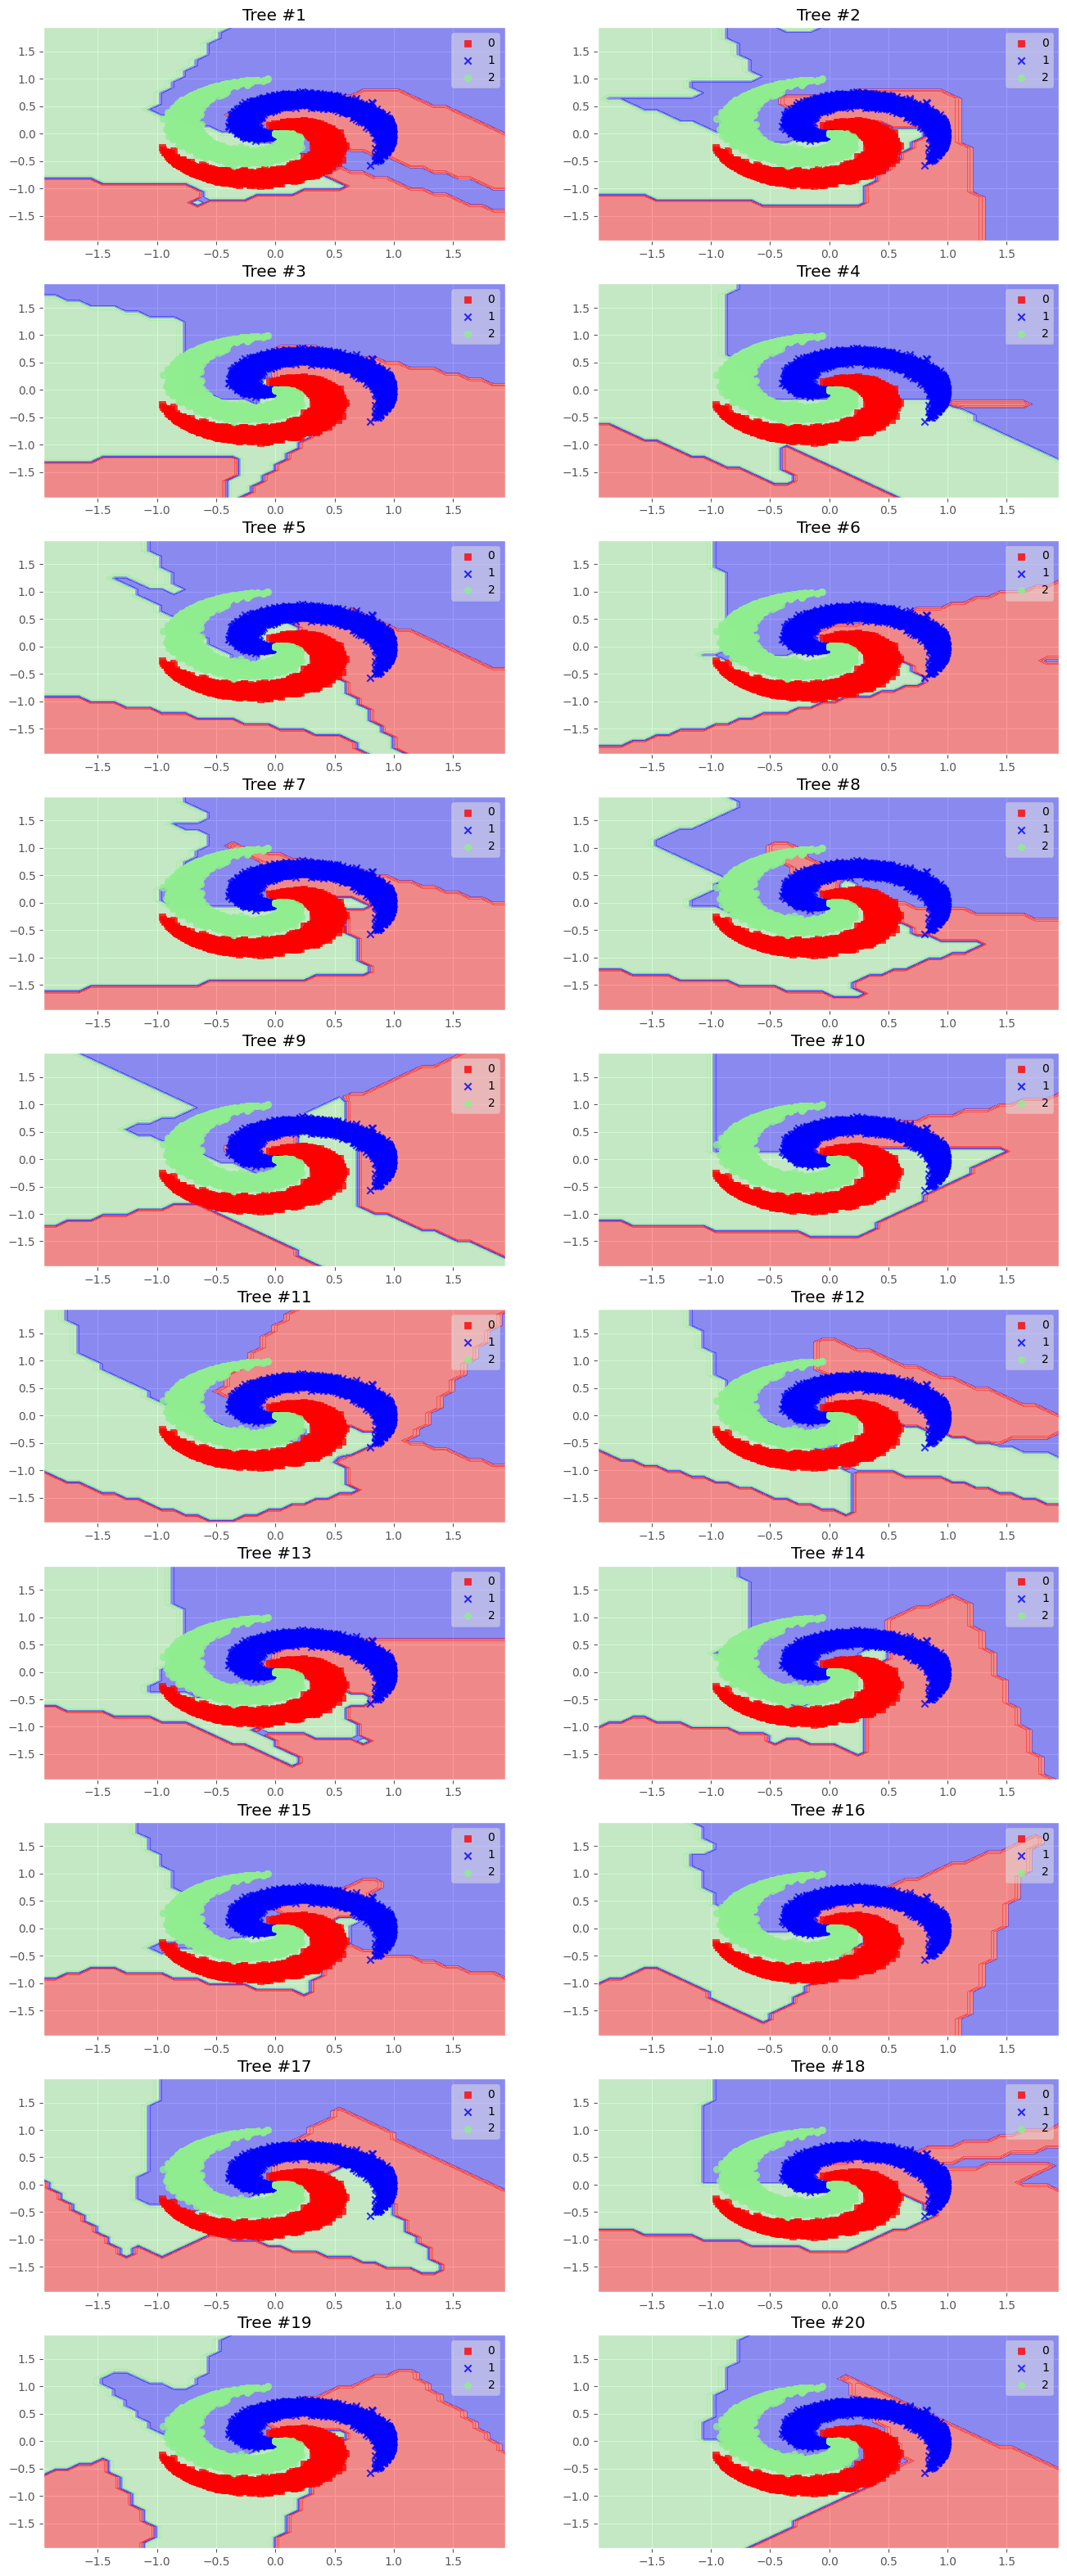

In [40]:
ntrees=rfc.ntrees
nrows=ntrees//2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

<function matplotlib.pyplot.tight_layout>

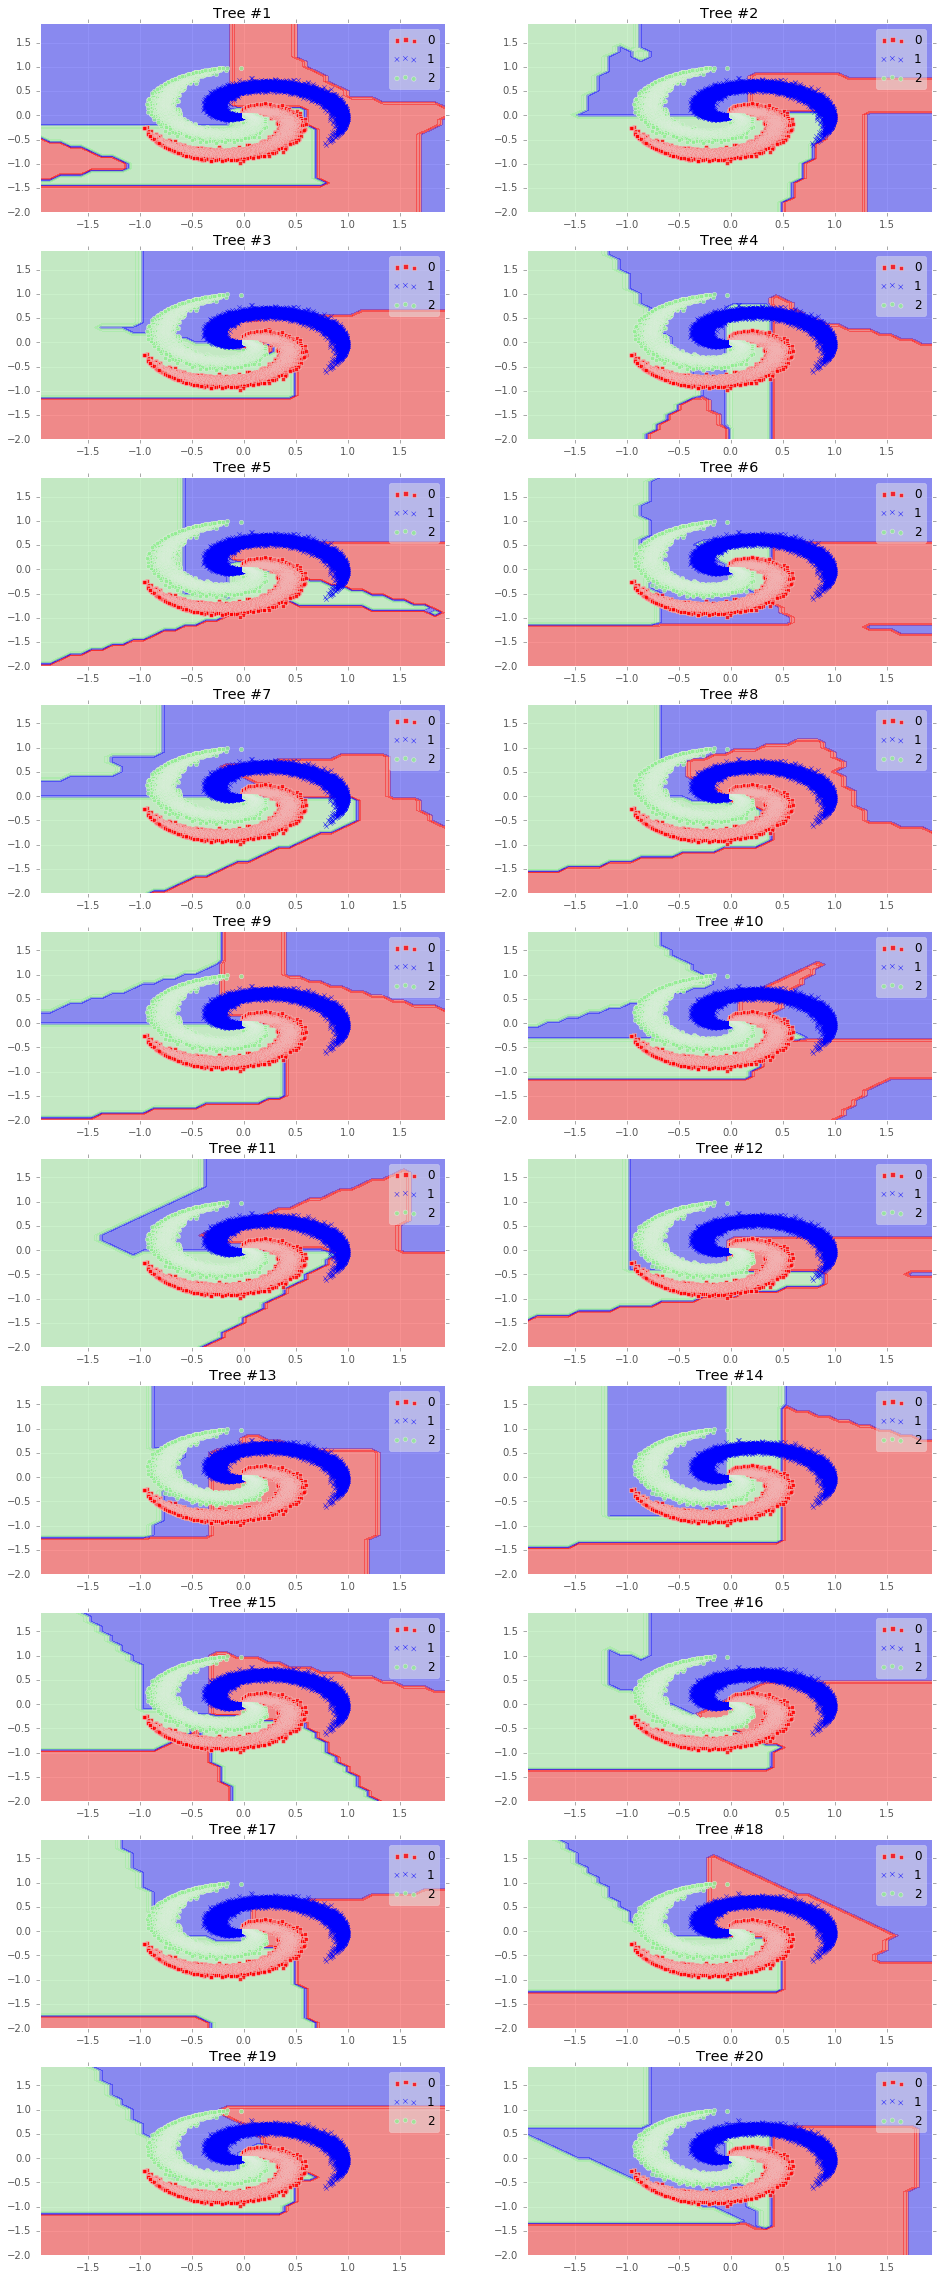

In [27]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [41]:

ntrees = range(1,20)
best_trees = 0
best_acc = 0.0

for n in ntrees:
    rfc=rf.RandomForest(weaklearner='Linear',ntrees=n,usebagging=False)
    rfc.train(X,Y)
    Ypt=rfc.predict(Xtest)
    acc = np.sum(Ytest.flatten() ==  np.array(Ypt.astype(np.uint8))) / float(Ytest.shape[0]) 
    print ("No. of Trees :",n, "Accuracy :", acc, "%")

    if acc > best_acc:
        best_acc = acc
        best_trees = n


print(f"\nBest Accuracy: {best_acc} with {best_trees} number of trees!")



No. of Trees : 1 Accuracy : 0.8214666666666667 %
No. of Trees : 2 Accuracy : 0.8571333333333333 %
No. of Trees : 3 Accuracy : 0.8641333333333333 %
No. of Trees : 4 Accuracy : 0.9142 %
No. of Trees : 5 Accuracy : 0.9402666666666667 %
No. of Trees : 6 Accuracy : 0.9015333333333333 %
No. of Trees : 7 Accuracy : 0.928 %
No. of Trees : 8 Accuracy : 0.9296 %
No. of Trees : 9 Accuracy : 0.9717333333333333 %
No. of Trees : 10 Accuracy : 0.9329333333333333 %
No. of Trees : 11 Accuracy : 0.9770666666666666 %
No. of Trees : 12 Accuracy : 0.937 %
No. of Trees : 13 Accuracy : 0.9531333333333334 %
No. of Trees : 14 Accuracy : 0.9824666666666667 %
No. of Trees : 15 Accuracy : 0.9764 %
No. of Trees : 16 Accuracy : 0.9685333333333334 %
No. of Trees : 17 Accuracy : 0.9741333333333333 %
No. of Trees : 18 Accuracy : 0.9716666666666667 %
No. of Trees : 19 Accuracy : 0.9798 %

Best Accuracy: 0.9824666666666667 with 14 number of trees!
